<a href="https://colab.research.google.com/github/AfifNurraihan/Kumpulan-Proyek-Python/blob/main/NLP_dengan_arsitektur_LSTM_(SPAM_Text_message).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library and read datasets
import pandas as pd
df = pd.read_csv('/content/SPAM text message 20170820.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
#Checking for null values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
# Cleaning Message
import re
def preprocessor(data):
    corpus = []
    for i in range(len(data)):
        # remove urls
        message = re.sub(r'http\S+', ' ', data[i])
        # remove html tags
        message = re.sub(r'<.*?>', ' ', message)
        #remove @...
        message = re.sub('@\w+([-.]\w+)*', ' ', message)
        #remove &...
        message = re.sub('&\w+([-.]\w+)*', ' ', message)
        # remove digits
        message = re.sub(r'\d+', ' ', message)
        # remove hashtags
        message = re.sub(r'#\w+', ' ', message)
        review = re.sub('[^a-zA-Z]', ' ', message)
        review = review.lower()
        review = review.split()
        corpus.append(review)
    return corpus

In [ ]:
df['CleanMessage'] = preprocessor(df['Message'])
df

,Category,Message,CleanMessage
0,ham,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, i, don, t, think, he, goes, to, usf, he,..."
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[this, is, the, nd, time, we, have, tried, con..."
5568,ham,Will ü b going to esplanade fr home?,"[will, b, going, to, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...","[pity, was, in, mood, for, that, so, any, othe..."
5570,ham,The guy did some bitching but I acted like i'd...,"[the, guy, did, some, bitching, but, i, acted,..."


In [ ]:
# Perform one-hot-encoding and create a new dataframe
kategori = pd.get_dummies(df.Category)
df_new = pd.concat([df, kategori], axis=1)
df_new = df_new.drop(columns=['Category','Message'])
df_new

,CleanMessage,ham,spam
0,"[go, until, jurong, point, crazy, available, o...",1,0
1,"[ok, lar, joking, wif, u, oni]",1,0
2,"[free, entry, in, a, wkly, comp, to, win, fa, ...",0,1
3,"[u, dun, say, so, early, hor, u, c, already, t...",1,0
4,"[nah, i, don, t, think, he, goes, to, usf, he,...",1,0
...,...,...,...
5567,"[this, is, the, nd, time, we, have, tried, con...",0,1
5568,"[will, b, going, to, esplanade, fr, home]",1,0
5569,"[pity, was, in, mood, for, that, so, any, othe...",1,0
5570,"[the, guy, did, some, bitching, but, i, acted,...",1,0


In [ ]:
# Converts the values ​​from the dataframe into the numpy array data type using .values()
message = df_new['CleanMessage'].values
category = df_new[['ham','spam']].values

In [ ]:
# Divide the data into training data and testing data
from sklearn.model_selection import train_test_split
pesan_latih, pesan_test, kategori_latih, kategori_test = train_test_split(message, category, test_size=0.2)

In [ ]:
# Convert each word in the dataset into a numeric number with the Tokenizer function
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='<oov>')
tokenizer.fit_on_texts(pesan_latih) 
tokenizer.fit_on_texts(pesan_test)
 
sekuens_latih = tokenizer.texts_to_sequences(pesan_latih)
sekuens_test = tokenizer.texts_to_sequences(pesan_test)
 
padded_latih = pad_sequences(sekuens_latih,padding='post',
                             maxlen=16,truncating='post') 
padded_test = pad_sequences(sekuens_test,padding='post',
                             maxlen=16,truncating='post')

In [ ]:
# Callback Function
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98):
      print("\nAkurasi telah mencapai >96%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
# Creating a model architecture using layers Embedding and LSTM
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# Train the model by calling the function .fit()
num_epochs = 30
history = model.fit(padded_latih,kategori_latih, epochs=num_epochs,validation_data=(padded_test, kategori_test),verbose=2,callbacks=[callbacks])

Epoch 1/30
140/140 - 8s - loss: 0.2223 - accuracy: 0.9215 - val_loss: 0.1023 - val_accuracy: 0.9632 - 8s/epoch - 55ms/step
Epoch 2/30

Akurasi telah mencapai >96%!
140/140 - 5s - loss: 0.0553 - accuracy: 0.9861 - val_loss: 0.0584 - val_accuracy: 0.9785 - 5s/epoch - 35ms/step


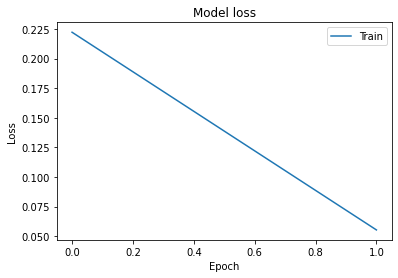

In [ ]:
# plot loss and accuracy during training and validation.
# Plot Loss Training
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

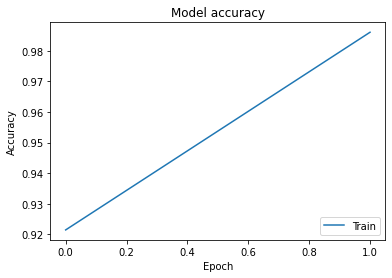

In [ ]:
# Plot Accuracy Training
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()